In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Startup_India.csv')
data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,16534920,13689780,47178410,New Delhi,19226183
1,16259770,15137759,44389853,Bangalore,19179206
2,15344151,10114555,40793454,Mumbai,19105039
3,14437241,11867185,38319962,New Delhi,18290199
4,14210734,9139177,36616842,Mumbai,16618794


In [3]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 4].values
x

array([[16534920, 13689780, 47178410, 'New Delhi'],
       [16259770, 15137759, 44389853, 'Bangalore'],
       [15344151, 10114555, 40793454, 'Mumbai'],
       [14437241, 11867185, 38319962, 'New Delhi'],
       [14210734, 9139177, 36616842, 'Mumbai'],
       [13187690, 9981471, 36286136, 'New Delhi'],
       [13461546, 14719887, 12771682, 'Bangalore'],
       [13029813, 14553006, 32387668, 'Mumbai'],
       [12054252, 14871895, 31161329, 'New Delhi'],
       [12333488, 10867917, 30498162, 'Bangalore'],
       [10191308, 11059411, 22916095, 'Mumbai'],
       [10067196, 9179061, 24974455, 'Bangalore'],
       [9386375, 12732038, 24983944, 'Mumbai'],
       [9199239, 13549507, 25266493, 'Bangalore'],
       [11994324, 15654742, 25651292, 'Mumbai'],
       [11452361, 12261684, 26177623, 'New Delhi'],
       [7801311, 12159755, 26434606, 'Bangalore'],
       [9465716, 14507758, 28257431, 'New Delhi'],
       [9174916, 11417579, 29491957, 'Mumbai'],
       [8641970, 15351411, 0, 'New Delhi'

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()
x

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+07,   1.36897800e+07,   4.71784100e+07],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+07,   1.51377590e+07,   4.43898530e+07],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+07,   1.01145550e+07,   4.07934540e+07],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+07,   1.18671850e+07,   3.83199620e+07],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+07,   9.13917700e+06,   3.66168420e+07],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+07,   9.98147100e+06,   3.62861360e+07],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+07,   1.47198870e+07,   1.27716820e+07],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.30298130e+07,   1.45530060e+07,   3.23876680e+07],


In [5]:
x = x[:, 1:]
x

array([[  0.00000000e+00,   1.00000000e+00,   1.65349200e+07,
          1.36897800e+07,   4.71784100e+07],
       [  0.00000000e+00,   0.00000000e+00,   1.62597700e+07,
          1.51377590e+07,   4.43898530e+07],
       [  1.00000000e+00,   0.00000000e+00,   1.53441510e+07,
          1.01145550e+07,   4.07934540e+07],
       [  0.00000000e+00,   1.00000000e+00,   1.44372410e+07,
          1.18671850e+07,   3.83199620e+07],
       [  1.00000000e+00,   0.00000000e+00,   1.42107340e+07,
          9.13917700e+06,   3.66168420e+07],
       [  0.00000000e+00,   1.00000000e+00,   1.31876900e+07,
          9.98147100e+06,   3.62861360e+07],
       [  0.00000000e+00,   0.00000000e+00,   1.34615460e+07,
          1.47198870e+07,   1.27716820e+07],
       [  1.00000000e+00,   0.00000000e+00,   1.30298130e+07,
          1.45530060e+07,   3.23876680e+07],
       [  0.00000000e+00,   1.00000000e+00,   1.20542520e+07,
          1.48718950e+07,   3.11613290e+07],
       [  0.00000000e+00,   0.0000000

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

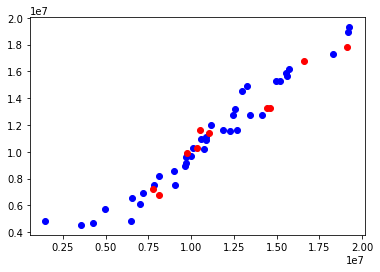

In [8]:
y_pred = model.predict(x_test)
plt.scatter(y_train,model.predict(x_train),color='b')
plt.scatter(y_test,model.predict(x_test),color='r')
plt.show()


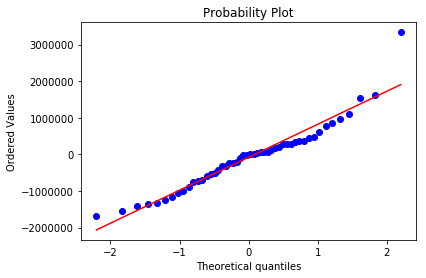

NormaltestResult(statistic=14.588055054555056, pvalue=0.00067958548450316276)

In [9]:
from scipy import stats as st
res = model.predict(x)-y
st.probplot(res,plot=plt)
plt.show()
st.normaltest(res)

In [10]:
import statsmodels.formula.api as sm
x = np.append(arr = np.ones((50, 1)).astype(int), values = x, axis = 1)
X_opt = x[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           1.34e-27
Time:                        11:53:11   Log-Likelihood:                -755.64
No. Observations:                  50   AIC:                             1523.
Df Residuals:                      44   BIC:                             1535.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+06   6.88e+05      7.281      0.000    3.62e+06     6.4e+06
x1          1.988e+04   3.37e+05      0.059      0.953    -6.6e+05    6.99e+05
x2         -4188.7019   3.26e+05     -0.013      0.990    -6.6e+05    6.52e+05
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X_opt = x[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           8.49e-29
Time:                        11:56:44   Log-Likelihood:                -755.64
No. Observations:                  50   AIC:                             1521.
Df Residuals:                      45   BIC:                             1531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+06   6.65e+05      7.537      0.000    3.67e+06    6.35e+06
x1          2.202e+04    2.9e+05      0.076      0.940   -5.62e+05    6.06e+05
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X_opt = x[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           4.53e-30
Time:                        11:57:01   Log-Likelihood:                -755.64
No. Observations:                  50   AIC:                             1519.
Df Residuals:                      46   BIC:                             1527.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+06   6.57e+05      7.626      0.000    3.69e+06    6.34e+06
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X_opt = x[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           2.16e-31
Time:                        12:00:53   Log-Likelihood:                -755.79
No. Observations:                  50   AIC:                             1518.
Df Residuals:                      47   BIC:                             1523.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+06   2.69e+05     17.464      0.000    4.16e+06    5.24e+06
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""